In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 2: Generate a mock customer dataset
np.random.seed(42)
n_customers = 300
data = {
    'CustomerID': np.arange(1, n_customers + 1),
    'Age': np.random.randint(18, 70, size=n_customers),
    'Annual Income (k$)': np.random.randint(20, 150, size=n_customers),
    'Spending Score (1-100)': np.random.randint(1, 100, size=n_customers),
    'Customer Tenure (Years)': np.random.randint(1, 10, size=n_customers)
}

df = pd.DataFrame(data)

In [3]:
# Step 3: Data Preprocessing (Scaling the features)
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Customer Tenure (Years)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

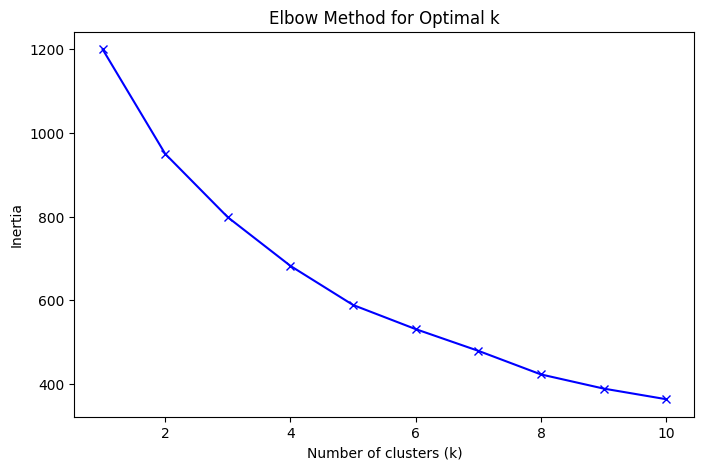

In [4]:
# Step 4: Determine optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [5]:
# Step 5: Apply KMeans clustering with the chosen number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [6]:
# Step 6: Analyze the clusters
df_clustered = df.groupby('Cluster').mean()
print(df_clustered)

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0        145.162162  40.986486          126.756757               71.108108   
1        157.350000  53.700000           77.750000               28.612500   
2        141.633803  33.084507           51.352113               72.507042   
3        156.853333  44.240000           89.626667               29.800000   

         Customer Tenure (Years)  
Cluster                           
0                       5.310811  
1                       7.175000  
2                       5.197183  
3                       2.173333  


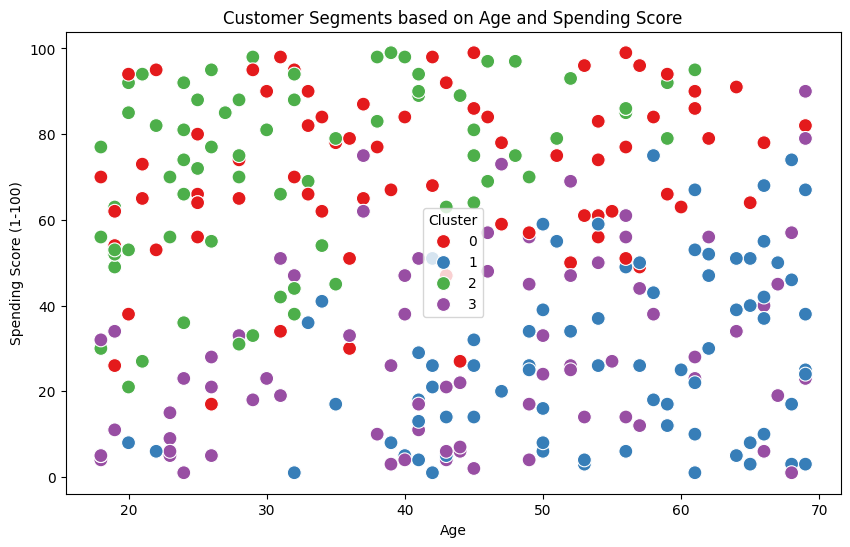

In [7]:
# Step 7: Visualize the clusters (using Age and Spending Score for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [8]:
# Step 8: Calculate Silhouette Score to evaluate clustering performance
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.21
